#### Import Required Libraries

Import necessary libraries such as pandas, numpy, matplotlib, and seaborn for data analysis and visualization.


In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

# Suppress any warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sub = pd.read_csv('SampleSubmission.csv')

In [3]:
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [5]:
train.shape

(4809, 23)

In [5]:
train.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [6]:
cat_features = train.select_dtypes(include="object").columns.to_list()
cat_features

['ID',
 'country',
 'age_group',
 'travel_with',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'payment_mode',
 'first_trip_tz',
 'most_impressing']

In [7]:

num_features = train.select_dtypes(include="number").columns.to_list()
num_features

['total_female',
 'total_male',
 'night_mainland',
 'night_zanzibar',
 'total_cost']

In [8]:
train["total_female"] = train["total_female"].mean()

In [9]:
train["total_female"] = train["total_female"].fillna(
    train["total_female"].mean())
train["total_female"] = train["total_female"].fillna(
    train["total_female"].mean())
train["total_male"] = train["total_male"].fillna(train["total_male"].mean())

## Exploratory Data Analysis Practice: Tanzania Tourism Dataset

##### 1. **Missing Values Analysis**

**_Task_**:

Visualize the proportion of missing values for each feature using a bar chart.

**Experimental Question:**

- Which features have the highest proportion of missing values, and how might this affect the reliability of our analysis?

- Are the missing values random, or do they show a pattern related to specific types of visitors or variables?


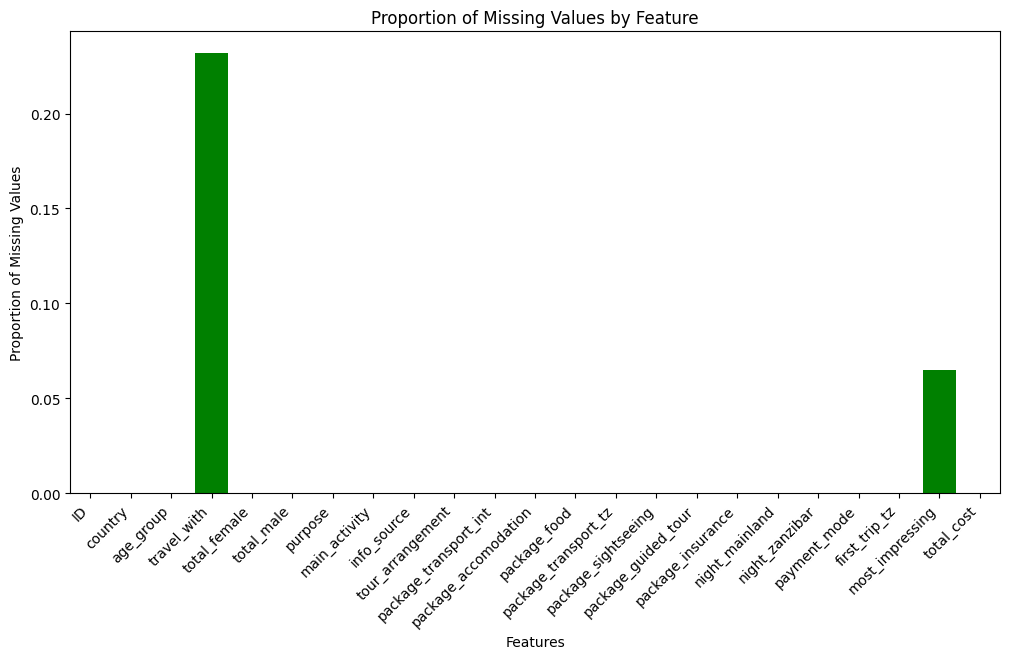

In [10]:
# Calculate the proportion of missing values for each feature
missing_values = train.isnull().mean()

# Plot the missing values as a bar chart
# Set the figure size for better readability. This line sets the size of the figure to 12 inches wide and 6 inches tall, which helps in making the plot more readable and visually appealing.
plt.figure(figsize=(12, 6))


plt.bar(missing_values.index, missing_values.values,
        color='green')  # Create a bar chart with green color
# Create a bar chart with green color
missing_values.plot(kind='bar', color='green')

# Set the title of the chart
plt.title('Proportion of Missing Values by Feature')
plt.xlabel('Features')  # Label the x-axis
plt.ylabel('Proportion of Missing Values')  # Label the y-axis

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()  # Display the plot

In [11]:
# count the number of unique values in each categorical feature

# Sort the unique values in descending order and display the top 10
train[cat_features].nunique().sort_values(ascending=False).head(10)

ID                  4809
country              105
main_activity          9
info_source            8
purpose                7
most_impressing        7
travel_with            5
age_group              4
payment_mode           4
tour_arrangement       2
dtype: int64

#### 2. **Categorical Feature Distribution**

Task:

Visualize the distribution of values for each categorical variable using bar charts with target variable.

Experimental Questions:

- What are the most common categories in each variable (e.g., who do tourists most often travel with? What is the most common purpose of visit)?

- Are there any categories that are underrepresented or surprisingly dominant?

- Are any features heavily imbalanced, possibly requiring re-grouping or adjustment in future modeling?


In [12]:
# Get categorical columns
categorical_columns = train.columns[train.dtypes == 'object'].tolist()
# This filters the columns in the dataset train where the data type is object, which typically indicates text or categorical data. The result is a list of column names that contain categorical data

# Print the categorical columns
print("Categorical Columns:")
for col in categorical_columns:
    print(col)

Categorical Columns:
ID
country
age_group
travel_with
purpose
main_activity
info_source
tour_arrangement
package_transport_int
package_accomodation
package_food
package_transport_tz
package_sightseeing
package_guided_tour
package_insurance
payment_mode
first_trip_tz
most_impressing


In [ ]:
# Visualize the distribution of values for each categorical variable
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x=column, hue='purpose', palette='viridis')
    plt.title(f'Distribution of {column} with Purpose')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Purpose')
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

### 3. **_Descriptive Statistics for Categorical Features_**

Task:

Generate a statistical summary for all categorical features using the .describe() method.

Experimental Questions:

- What is the most frequently occurring category in each feature, and what might this indicate about tourist behavior?

- Do certain features show high or low diversity in values (e.g., many unique values vs. few repeated ones)?

- Are there features where the top category dominates disproportionately?


In [5]:
# Generate a statistical summary for all categorical features
categorical_summary = train[categorical_columns].describe()

# Display the summary
print(categorical_summary)

NameError: name 'categorical_columns' is not defined

In [42]:
# Extract the most frequently occurring category for each categorical feature
most_frequent_categories = categorical_summary.loc['freq']

# Display the most frequent categories
print("Most Frequently Occurring Categories:")
print(most_frequent_categories)

Most Frequently Occurring Categories:
ID                          1
country                   695
age_group                2487
travel_with              1265
purpose                  2840
main_activity            2259
info_source              1913
tour_arrangement         2570
package_transport_int    3357
package_accomodation     2602
package_food             2748
package_transport_tz     2919
package_sightseeing      3319
package_guided_tour      3259
package_insurance        4079
payment_mode             4172
first_trip_tz            3243
most_impressing          1541
Name: freq, dtype: object


#### **4. Boxplot of Total Cost by Age Group and Categorical Variables**

Task:

Create boxplots to analyze how total_cost varies by age_group across the following variables:

- travel_with
- purpose
- info_source
- payment_mode
- main_activity

Experimental Questions:

- How does the spending behavior vary across different age group

- Do certain travel companions (e.g., traveling alone vs. with family) influence cost significantly within each age group?

- Are specific purposes of travel (e.g., leisure vs. business) associated with higher spending, and does this vary by age?

- Do the sources of travel information or payment methods correlate with higher or lower costs?

- Which main tourism activities are associated with the highest spending, and are younger or older tourists more likely to engage in them?


In [4]:
# Create boxplots for total_cost by age_group across specified categorical variables
for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=train, x='age_group', y='total_cost', hue=column)
    plt.title(f'Total Cost by Age Group and {column}')
    plt.xlabel('Age Group')
    plt.ylabel('Total Cost')
    plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

NameError: name 'categorical_columns' is not defined

##### **5. Subset Analysis: Ethiopian Tourists**

Task:

- Filter the dataset to focus on tourists from Ethiopia. Perform EDA specific to this subgroup.

Experimental Questions:

- What are the most common age groups, travel companions, and purposes of visit among Ethiopian tourists?

- How does the spending pattern of Ethiopian tourists compare to the overall dataset?

- Are there notable differences in the preferred activities or payment methods for Ethiopian tourists?

- Does this group show any unique trends or behaviors that may inform targeted marketing or tourism policy?


Ethiopian Tourists Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 512 to 4554
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     6 non-null      object 
 1   country                6 non-null      object 
 2   age_group              6 non-null      object 
 3   travel_with            3 non-null      object 
 4   total_female           6 non-null      float64
 5   total_male             6 non-null      float64
 6   purpose                6 non-null      object 
 7   main_activity          6 non-null      object 
 8   info_source            6 non-null      object 
 9   tour_arrangement       6 non-null      object 
 10  package_transport_int  6 non-null      object 
 11  package_accomodation   6 non-null      object 
 12  package_food           6 non-null      object 
 13  package_transport_tz   6 non-null      object 
 14  package_sightseeing    6 

C:\Users\HP\AppData\Local\Temp\ipykernel_30320\1311805317.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ethiopian_tourists, x='age_group', y='total_cost', palette='Set2')


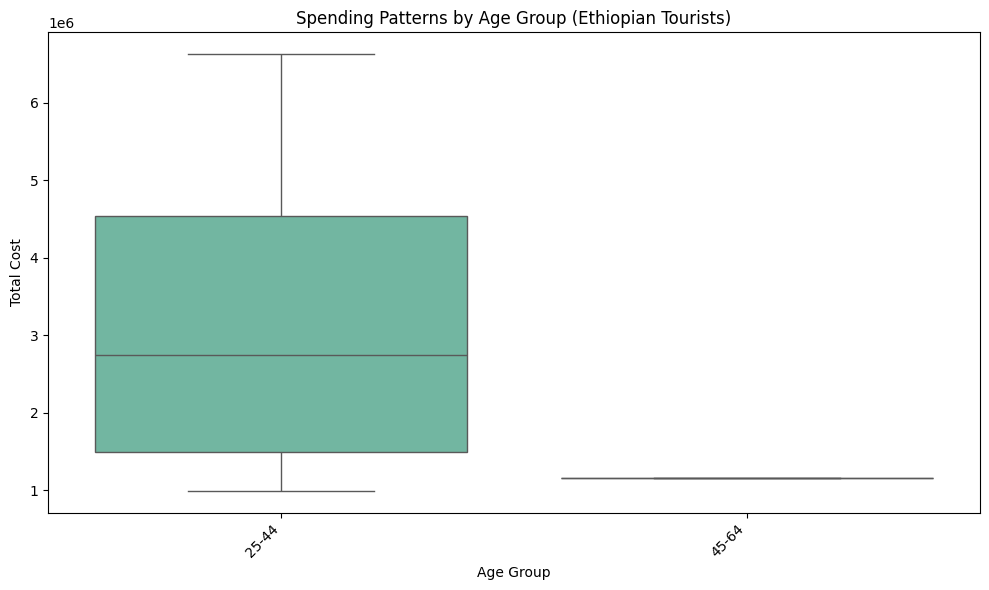

In [ ]:
# Filter the dataset for Ethiopian tourists
ethiopian_tourists = train[train['country'] == 'ETHIOPIA']

# Display basic information about the subset
print("Ethiopian Tourists Dataset Overview:")
print(ethiopian_tourists.info())

# Analyze the most common age groups, travel companions, and purposes of visit
print("\nMost Common Age Groups:")
print(ethiopian_tourists['age_group'].value_counts())

print("\nMost Common Travel Companions:")
print(ethiopian_tourists['travel_with'].value_counts())

print("\nMost Common Purposes of Visit:")
print(ethiopian_tourists['purpose'].value_counts())

# Compare spending patterns
print("\nSpending Pattern Comparison:")
print("Average Total Cost (Ethiopian Tourists):",
      ethiopian_tourists['total_cost'].mean())
print("Average Total Cost (Overall):", df['total_cost'].mean())

# Analyze preferred activities and payment methods
print("\nPreferred Main Activities:")
print(ethiopian_tourists['main_activity'].value_counts())

print("\nPreferred Payment Methods:")
print(ethiopian_tourists['payment_mode'].value_counts())

# Visualize spending patterns
plt.figure(figsize=(10, 6))
sns.boxplot(data=ethiopian_tourists, x='age_group',
            y='total_cost', palette='Set2')
plt.title('Spending Patterns by Age Group (Ethiopian Tourists)')
plt.xlabel('Age Group')
plt.ylabel('Total Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()